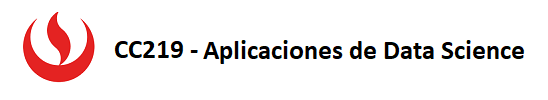

<h3 align="center"><b>TA1:</b> NLP - Normalización de textos </h3>
<h3 align="center">2025-2</h3>




---


**Nombre del Alumno:**  
**Código:**  


---



### **NLP: Normalización de textos y Bolsa de Palabras**

* El corpus que se normalizará consiste en una serie de artículos obtenidos de la web "https://www.elmundotoday.com/".


* Estos artículos se encuentran en el fichero csv **corpus_mundo_today.csv** que deberá adjuntar al notebook.


* Este CSV esta formado por 3 campos que son:
    - Tema
    - Título
    - Texto
    
    
* El ejercicio consiste en Normalizar este ***Corpus*** tomando el *título* y *texto* como contenido de cada documento.

Puede utilizar indistintamente las librerias **NLTK** y **Spacy** para el preprocesamiento (normalización) del texto.


## Ejercicios de Nomalización solicitados:

* Dada una lista en la que cada elemento de la misma tiene el contenido (título + texto) de cada documento del corpus se pide:
<span></span><br><br>
    1. **Crear una función que devuelva los documentos *Tokenizados* (una lista de listas) y con los tokens (palabras) en minúsculas.**
        * **input**: lista de documentos (lista de Strings).
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
<span></span><br><br>
    2. **Crear una función que elimine los tokens que sean signos de puntuación y *Stop-Words*.**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
<span></span><br><br>
    3. **Crear una función que transforme cada token a su lema (*Lematización*)**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
<span></span><br><br>
    4. **Crear una función que elimine todos los tokens que no sean *Nombres* (NOUN, PROPN), *Verbos*, *Advervios* o *Adjetivos*.**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
 <span></span><br><br>       
    5. **Función que dada una lista de documentos, devuelva los documentos normalizados. Este ejercicio ya esta hecho y simplemente tiene que funcionar llamando a las 4 funciones anteriores.**
        * **input**: lista de documentos (lista de Strings).
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.


* Finalizada la normalización anterior, se pide:

    6. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, elimine del corpus aquellos tokens que aparecen menos de 'N' veces (N=10) en el corpus**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
        * **input**: 'N' -> Parámetro que nos indica el número mínimo de apariciones de la palabra en el corpus.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
<span></span><br><br>
   
<hr>

## Ejercicios de Nomalización:

* Leemos el corpus y pasamos los documentos (Título + Texto) a una lista

In [28]:
docs_file = 'corpus_mundo_today.csv'
docs_list = list()
file_txt = open(docs_file, encoding="utf8").read()
for line in file_txt.split('\n'):
    line = line.split('||')
    docs_list.append(line[1] + ' ' + line[2])
docs_list = docs_list[1:] # Elimino la cabecera del fichero

#### 1. **Crear una función que devuelva los documentos *Tokenizados* (una lista de listas) y con los tokens (palabras) en minúsculas.** (3ptos)

* **input**: lista de documentos (lista de Strings).
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [29]:
def tokenization(docs_list):
    tokenized_docs = []

    for doc in docs_list:
        # tokenizacion y conversion a minisculas
        tokens = doc.lower().split()
        tokenized_docs.append(tokens)

    return tokenized_docs


#### 2. **Crear una función que elimine los tokens que sean signos de puntuación y *Stop-Words*.** (3ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [30]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def remove_words(docs):
    stop_words = set(stopwords.words('spanish'))

    punctuation = set([
    '.', ',', ':', ';', '!', '?', '(', ')',
    '[', ']', '"', "'", '-', '--', '...'
    ])

    cleaned_docs = []
    for doc in docs:
        cleaned_tokens = [token for token in doc if token.lower() not in stop_words and token not in punctuation]
        cleaned_docs.append(cleaned_tokens)

    return cleaned_docs

#### 3. **Crear una función que transforme cada token a su lema (*Lematización*)** (3ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [32]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lematization(docs):
    lemmatizer = WordNetLemmatizer()
    lemmatized_docs = []
    for doc in docs:
        lemmas = [lemmatizer.lemmatize(token) for token in doc]
        lemmatized_docs.append(lemmas)
    return lemmatized_docs


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 4. **Crear una función que elimine todos los tokens que no sean *Nombres* (NOUN, PROPN), *Verbos*, *Advervios* o *Adjetivos*.** (4ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [33]:
! python -m spacy download es


⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 53.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [34]:

import spacy
nlp = spacy.load('es_core_news_sm')

def filter_words(docs):
    filtered_docs = []
    for doc in docs:
        text = ' '.join(doc)
        doc_spacy = nlp(text)

        filtered_tokens = [token.text for token in doc_spacy if token.pos_ in ['NOUN', 'PROPN', 'VERB', 'ADV', 'ADJ']]
        filtered_docs.append(filtered_tokens)

    return filtered_docs


#### 5. **Función que dada una lista de documentos, devuelva los documentos normalizados. Este ejercicio ya esta hecho y simplemente tiene que funcionar llamando a las 4 funciones anteriores.** (3ptos)

* **input**: lista de documentos (lista de Strings).
* **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.

In [56]:
def normalization(docs_list):
    corpus = tokenization(docs_list)
    corpus = remove_words(corpus)
    corpus = lematization(corpus)
    corpus = filter_words(corpus)
    return corpus

corpus = normalization(docs_list)
print(corpus[0])

['gobierno', 'español', 'sumará', 'junqueras', 'condenas', 'cumplir', 'puigdemont', 'después', 'revés', 'recibido', 'gobierno', 'españa', 'puesta', 'libertad', 'carles', 'puigdemont', 'parte', 'justicia', 'alemana', 'juez', 'pablo', 'llarena', 'decidido', 'semana', 'instancias', 'ejecutivo', 'sumará', 'oriol', 'junqueras', 'condenas', 'cumplir', 'líder', 'pdecat', 'exvicepresidente', 'cataluña', 'permanece', 'prisión', 'madrileña', 'estremera', 'pasado', 'noviembre', 'asumiría', 'delitos', 'atribuidos', 'carles', 'puigdemont', 'manera', 'tribunal', 'supremo', 'asegura', 'actos', 'expresidente', 'catalán', 'última', 'legislatura', 'quedan', 'impunes', '“', 'junqueras', 'pagará', 'maniobra', 'ideada', 'burlar', 'justicia', 'alemana', 'líder', 'esquerra', 'republicana', 'enfrenta', 'años', 'prisión', 'seguiremos', 'adelante', 'junqueras', 'caigan', 'años', 'más', 'parar', 'dicho', 'hoy', 'carles', 'puigdemont', 'alemania', 'haré', 'hacer', 'junqueras', 'sacrificar', 'asumiré', 'resignació

#### En este ejercicio podemos ver como reducimos las palabras (tokens) del texto original, quedandonos con lo importante y normalizado

In [53]:
def get_tokens(text):
    return text.split()

def normalize(text):
    return filter_words(lematization(remove_words(tokenization([text]))))[0]

In [51]:
raw = docs_list[0]
print(raw)

El Gobierno español sumará a Junqueras las condenas que no vaya a cumplir Puigdemont Después del revés recibido por el Gobierno de España tras la puesta en libertad de Carles Puigdemont por parte de la justicia alemana, el juez Pablo Llarena ha decidido esta semana, a instancias del Ejecutivo, que sumará a Oriol Junqueras las condenas que no vaya a cumplir el líder del PDeCAT. El exvicepresidente de Cataluña, que permanece en la prisión madrileña de Estremera desde el pasado dos de noviembre, asumiría por tanto todos los delitos atribuidos a Carles Puigdemont y, de esta manera, el Tribunal Supremo se asegura de que los actos del expresidente catalán durante la última legislatura no quedan impunes, ya que “Junqueras pagará por todos y cada uno de ellos”. Con esta maniobra ideada para burlar la justicia alemana, el líder de Esquerra Republicana se enfrenta a 50 años más de prisión. “Seguiremos adelante aunque a Junqueras le caigan cien años más, nadie nos va a parar”, ha dicho hoy Carles

In [54]:
print('Número de tokens del texto original: ' + str(len(get_tokens(raw))))
print('Número de tokens distintos del texto original: ' + str(len(set(get_tokens(raw)))))
print('Número de tokens tras la normalización: ' + str(len(normalize(raw))))
print('Número de tokens distintos tras la normalización: ' + str(len(set(normalize(raw)))))

Número de tokens del texto original: 270
Número de tokens distintos del texto original: 165
Número de tokens tras la normalización: 130
Número de tokens distintos tras la normalización: 105


<hr>

#### 6. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, elimine del corpus aquellos tokens que aparecen menos de 'N' veces (N=10) en el corpus** (4ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
* **input**: 'N' -> Parámetro que nos indica el número mínimo de apariciones de la palabra en el corpus.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.

In [37]:
from collections import Counter

def drop_less_frecuency_words(corpus, n):
    all_tokens = [token for doc in corpus for token in doc]
    token_counts = Counter(all_tokens)

    filtered_corpus = []
    for doc in corpus:
        filtered_doc = [token for token in doc if token_counts[token] >= n]
        filtered_corpus.append(filtered_doc)

    return filtered_corpus

corpus = drop_less_frecuency_words(corpus, 10)
print(corpus[0])

['gobierno', 'puigdemont', 'después', 'gobierno', 'españa', 'puigdemont', 'parte', 'semana', 'líder', 'cataluña', 'pasado', 'puigdemont', 'catalán', 'última', '“', 'líder', 'años', 'años', 'más', 'dicho', 'hoy', 'puigdemont', 'hacer', '”', '“', 'después', 'así', 'hace', 'semana']
